# 1. Анализ текста (Кошачья задача)

Фактически требуется создать матрицу Объекты-Признаки:

<img src ="https://ucarecdn.com/42beb2ca-1e77-415c-a84e-482344eafa19/">


В нашем случае:

- **Объекты** - строки
- **Признаки** - количество слов в строке


ПРИМЕР того как может выглядеть такая таблица (сокращённый вариант):

<img src="https://ucarecdn.com/f900465f-dc26-44cd-a362-0fb309c78182/">

*Для некоторых слов возможны значения больше 1. Например, слово "the" в 13 строке.*

После чего определить сходство между 1 строкой и каждой из последующих посредством косинусного расстояния - <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html">scipy.spatial.distance.cosine()</a>.

### Косинусное расстояние:
    
$$1 - \frac{u \cdot v}{\left \| u \right \|_{2} \cdot \left \| v \right \| _{2}}$$

Упражнения для самопроверки по отдельным этапам задачи - https://gist.github.com/lexnekr/2f1cb554651027970ab14ebaed8b3960#file-cats-exercises-ipynb

In [2]:
with open('anaconda.txt') as infile:
    text = infile.readlines()

In [3]:
text

['Any large snake that "constricts" its prey (see Constriction), if applied loosely, was called anaconda, though this usage is now archaic.\n',
 'An anaconda is a large snake found in tropical South America.\n',
 'Although the name applies to a group of snakes, it is often used to refer only to one species in particular, the common or green anaconda, Eunectes murinus, which is the largest snake in the world by weight, and the second longest.\n',
 'The giant anaconda is a mythical snake of enormous proportions said to be found in South America.\n',
 'Anaconda is an unincorporated community in Franklin County, Missouri, in the United States.\n',
 'In 1903, the Socialist Party of America won its first victory west of the Mississippi when Anaconda voters elected a socialist mayor, treasurer, police judge, and three councilmen.\n',
 'Anaconda was founded by Marcus Daly, one of the Copper Kings, who financed the construction of a smelter on nearby Warm Springs Creek to process copper ore fro

In [3]:
# re.split('[^a-z]', t)

In [4]:
import re
print text[0]
print text[0].lower()
print re.split('[^a-z]', text[0].lower())

Any large snake that "constricts" its prey (see Constriction), if applied loosely, was called anaconda, though this usage is now archaic.

any large snake that "constricts" its prey (see constriction), if applied loosely, was called anaconda, though this usage is now archaic.

['any', 'large', 'snake', 'that', '', 'constricts', '', 'its', 'prey', '', 'see', 'constriction', '', '', 'if', 'applied', 'loosely', '', 'was', 'called', 'anaconda', '', 'though', 'this', 'usage', 'is', 'now', 'archaic', '', '']


In [5]:
[word for word in re.split('[^a-z]', text[0].lower()) if word]

['any',
 'large',
 'snake',
 'that',
 'constricts',
 'its',
 'prey',
 'see',
 'constriction',
 'if',
 'applied',
 'loosely',
 'was',
 'called',
 'anaconda',
 'though',
 'this',
 'usage',
 'is',
 'now',
 'archaic']

In [6]:
def tokenize(sent):
    return [word for word in re.split('[^a-z]', sent.lower()) if word]

In [8]:
token_text = map(tokenize, text)
token_text

[['any',
  'large',
  'snake',
  'that',
  'constricts',
  'its',
  'prey',
  'see',
  'constriction',
  'if',
  'applied',
  'loosely',
  'was',
  'called',
  'anaconda',
  'though',
  'this',
  'usage',
  'is',
  'now',
  'archaic'],
 ['an',
  'anaconda',
  'is',
  'a',
  'large',
  'snake',
  'found',
  'in',
  'tropical',
  'south',
  'america'],
 ['although',
  'the',
  'name',
  'applies',
  'to',
  'a',
  'group',
  'of',
  'snakes',
  'it',
  'is',
  'often',
  'used',
  'to',
  'refer',
  'only',
  'to',
  'one',
  'species',
  'in',
  'particular',
  'the',
  'common',
  'or',
  'green',
  'anaconda',
  'eunectes',
  'murinus',
  'which',
  'is',
  'the',
  'largest',
  'snake',
  'in',
  'the',
  'world',
  'by',
  'weight',
  'and',
  'the',
  'second',
  'longest'],
 ['the',
  'giant',
  'anaconda',
  'is',
  'a',
  'mythical',
  'snake',
  'of',
  'enormous',
  'proportions',
  'said',
  'to',
  'be',
  'found',
  'in',
  'south',
  'america'],
 ['anaconda',
  'is',
  'an

In [10]:
set([word for sent in token_text for word in sent])

{'a',
 'abilities',
 'ability',
 'able',
 'abraham',
 'absorb',
 'acquired',
 'action',
 'actions',
 'adamantium',
 'adventure',
 'after',
 'aggressively',
 'album',
 'also',
 'although',
 'amalgamated',
 'america',
 'american',
 'among',
 'an',
 'anaconda',
 'anacondas',
 'and',
 'another',
 'any',
 'appear',
 'appeared',
 'appearing',
 'applied',
 'applies',
 'archaic',
 'are',
 'arms',
 'arrow',
 'as',
 'at',
 'australia',
 'awards',
 'away',
 'back',
 'barrel',
 'bass',
 'bay',
 'be',
 'beach',
 'because',
 'been',
 'beginning',
 'begins',
 'being',
 'bit',
 'blanche',
 'blockade',
 'blood',
 'blue',
 'books',
 'born',
 'bought',
 'breaking',
 'british',
 'brute',
 'built',
 'butte',
 'butterfly',
 'by',
 'called',
 'calling',
 'camera',
 'can',
 'captivity',
 'carolyn',
 'causing',
 'change',
 'city',
 'civil',
 'coaster',
 'coils',
 'collar',
 'colt',
 'comic',
 'comics',
 'common',
 'community',
 'company',
 'computers',
 'confederacy',
 'consequently',
 'consisting',
 'consolid

In [11]:
len(set([word for sent in token_text for word in sent]))

529

In [13]:
list(enumerate(set([word for sent in token_text for word in sent])))

[(0, 'ron'),
 (1, 'consolidated'),
 (2, 'informally'),
 (3, 'rod'),
 (4, 'founded'),
 (5, 'theaters'),
 (6, 'per'),
 (7, 'go'),
 (8, 'iii'),
 (9, 'to'),
 (10, 'th'),
 (11, 'under'),
 (12, 'fatal'),
 (13, 'sent'),
 (14, 'song'),
 (15, 'very'),
 (16, 'vociferous'),
 (17, 'horror'),
 (18, 'continues'),
 (19, 'blockade'),
 (20, 'ibm'),
 (21, 'starships'),
 (22, 'blanche'),
 (23, 'exits'),
 (24, 'turns'),
 (25, 'gui'),
 (26, 'roxxon'),
 (27, 'ryan'),
 (28, 'large'),
 (29, 'this'),
 (30, 'guiding'),
 (31, 'loads'),
 (32, 'refer'),
 (33, 'round'),
 (34, 'second'),
 (35, 'video'),
 (36, 'anaconda'),
 (37, 'further'),
 (38, 'dynamics'),
 (39, 'blue'),
 (40, 'appear'),
 (41, 'revolver'),
 (42, 'shares'),
 (43, 'crush'),
 (44, 'version'),
 (45, 'whitsunday'),
 (46, 'consisting'),
 (47, 'full'),
 (48, 'degree'),
 (49, 'french'),
 (50, 'met'),
 (51, 'studio'),
 (52, 'luis'),
 (53, 'change'),
 (54, 'solid'),
 (55, 'search'),
 (56, 'likened'),
 (57, 'kodiaks'),
 (58, 'credit'),
 (59, 'franklin'),
 (6

In [16]:
D = {word:i for i, word in enumerate(set([word for sent in token_text for word in sent]))}
D

{'a': 126,
 'abilities': 397,
 'ability': 316,
 'able': 253,
 'abraham': 273,
 'absorb': 388,
 'acquired': 298,
 'action': 61,
 'actions': 401,
 'adamantium': 511,
 'adventure': 124,
 'after': 121,
 'aggressively': 157,
 'album': 186,
 'also': 255,
 'although': 450,
 'amalgamated': 136,
 'america': 268,
 'american': 202,
 'among': 335,
 'an': 362,
 'anaconda': 36,
 'anacondas': 525,
 'and': 241,
 'another': 213,
 'any': 248,
 'appear': 40,
 'appeared': 337,
 'appearing': 423,
 'applied': 364,
 'applies': 370,
 'archaic': 488,
 'are': 304,
 'arms': 86,
 'arrow': 170,
 'as': 506,
 'at': 507,
 'australia': 415,
 'awards': 321,
 'away': 275,
 'back': 432,
 'barrel': 526,
 'bass': 190,
 'bay': 184,
 'be': 444,
 'beach': 116,
 'because': 428,
 'been': 347,
 'beginning': 195,
 'begins': 234,
 'being': 400,
 'bit': 420,
 'blanche': 22,
 'blockade': 19,
 'blood': 207,
 'blue': 39,
 'books': 180,
 'born': 434,
 'bought': 315,
 'breaking': 134,
 'british': 200,
 'brute': 479,
 'built': 252,
 'but

In [17]:
import numpy as np

In [21]:
M = np.zeros((len(token_text), len(D)))
M

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
M.shape

(44L, 529L)

In [23]:
i = 0
for sent in token_text:
    for word in sent:
        M[i, D[word]] += 1
    i += 1

In [24]:
M

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [25]:
M[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [27]:
sum([number for sent in M for number in sent])

1063.0

In [28]:
len([word for sent in token_text for word in sent])

1063

# 2. Аппроксимация функции (многочлен степени n)

Практикум - https://stepik.org/lesson/48784/step/1

Задача аппроксимировать многочленом n-й степени $w_0 + w_1x + w_2x^2 + w_3x^3 + ... + w_nx^n$

функцию $f(x) = sin(\frac{x}{5}) * e^{\frac{x}{10}} + 5 e^{-\frac{x}{2}}$

по $n+1$ точке

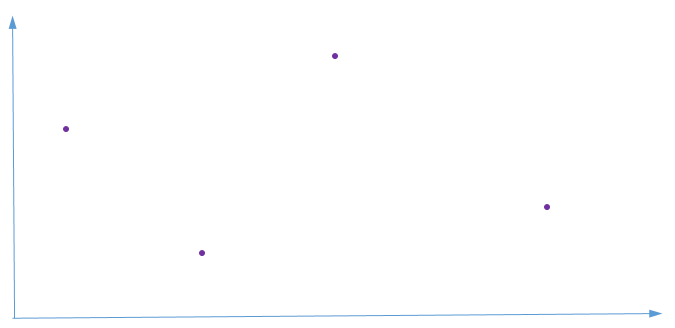

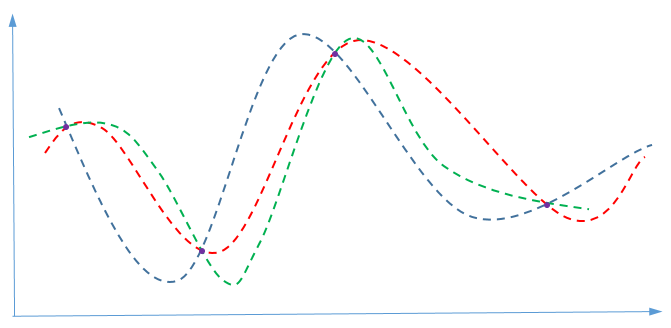

In [29]:
def g(x):
    return np.sin(x)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

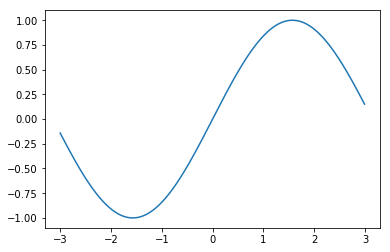

In [31]:
x = np.arange(-3, 3, 0.01)

plt.plot(x, g(x))

In [32]:
x_list = [-2, 0, 1, 3]

# w0 * w1*x +w2*x**2 + w3*x**3 = g(x)

In [34]:
A = np.vander(x_list)[:,::-1]
A

array([[ 1, -2,  4, -8],
       [ 1,  0,  0,  0],
       [ 1,  1,  1,  1],
       [ 1,  3,  9, 27]])

In [35]:
B = g(x_list)
B

array([-0.90929743,  0.        ,  0.84147098,  0.14112001])

In [37]:
w = np.linalg.solve(A, B)
w

array([ 0.        ,  0.92299273,  0.02370951, -0.10523125])

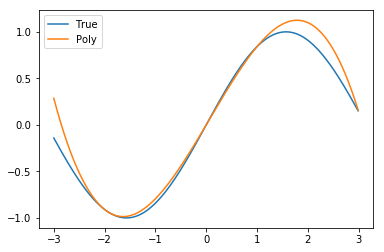

In [39]:
x = np.arange(-3, 3, 0.01)

def h(x, w):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

plt.plot(x, g(x), label='True')
plt.plot(x, h(x, w), label='Poly')

plt.legend(loc="best")

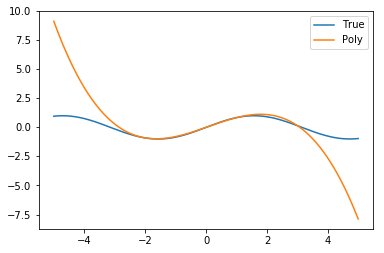

In [40]:
x = np.arange(-5, 5, 0.01)

plt.plot(x, g(x), label='True')
plt.plot(x, h(x, w), label='Poly')

plt.legend(loc="best")

# 3. Регулярные выражения (модуль re)

- Полезная статья - https://habrahabr.ru/post/115825/

- Документация - https://docs.python.org/2/library/re.html (примеры https://docs.python.org/2/library/re.html#examples)

- Памятка по re для данного курса - https://github.com/Coursera-machine-learning-data-analysis/1/blob/master/3.ipynb

## Чит-таблица Доктора Чака
Таблица заботливо предоставлена <a href="http://www.dr-chuck.com/">Dr. Charles R.</a> из Университета Мичигана и переведена на русский язык.

Таблица содержит самые простые символы и их комбинации в регулярных выражениях.

<table>
    <tbody>
    <tr><td><strong>^</strong></td><td>Начало новой строки</td></tr>
    <tr><td><strong>\$</strong></td><td>Окончание строки</td></tr>
    <tr><td><strong>.</strong></td><td>Любой символ</td></tr>
    <tr><td><strong>\s</strong></td><td>Пробел</td></tr>
    <tr><td><strong>\S</strong></td><td>Любой не пробельный символ</td></tr>
    <tr><td><strong>\*</strong></td><td>Повтор символа 0 и более раз</td></tr>
    <tr><td><strong>\*?</strong></td><td>Повтор символа 0 и более раз (не жадный)</td></tr>
    <tr><td><strong>+</strong></td><td>Повтор символа 1 и более раз</td></tr>
    <tr><td><strong>+?</strong></td><td>Повтор символа 1 и более раз (не жадный)</td></tr>
    <tr><td><strong>[aeiou]</strong></td><td>1 символ из набора</td></tr>
    <tr><td><strong>[^XYZ]</strong></td><td>1 символ <em>не</em> из набора</td></tr>
    <tr><td><strong>[a-z0-9]</strong></td><td>Набор символов в диапазоне от a до z и от 0 до 9</td></tr>
    <tr><td><strong>(</strong></td><td>Означает начало регулярного выражения</td></tr>
    <tr><td><strong>)</strong></td><td>Означает окончание регулярного выражения</td></tr>
    </tbody>
</table>


Больше правил для составления регулярных выражений можно найти здесь - https://docs.python.org/2/howto/regex.html

In [41]:
a = '''Any large snake that "constricts" its prey (see Constriction), if applied loosely, was called anaconda, though this usage is now archaic.
An anaconda is a large snake found in tropical South America.'''

In [43]:
re.split(' ', a)

['Any',
 'large',
 'snake',
 'that',
 '"constricts"',
 'its',
 'prey',
 '(see',
 'Constriction),',
 'if',
 'applied',
 'loosely,',
 'was',
 'called',
 'anaconda,',
 'though',
 'this',
 'usage',
 'is',
 'now',
 'archaic.\nAn',
 'anaconda',
 'is',
 'a',
 'large',
 'snake',
 'found',
 'in',
 'tropical',
 'South',
 'America.']

In [44]:
a.split()

['Any',
 'large',
 'snake',
 'that',
 '"constricts"',
 'its',
 'prey',
 '(see',
 'Constriction),',
 'if',
 'applied',
 'loosely,',
 'was',
 'called',
 'anaconda,',
 'though',
 'this',
 'usage',
 'is',
 'now',
 'archaic.',
 'An',
 'anaconda',
 'is',
 'a',
 'large',
 'snake',
 'found',
 'in',
 'tropical',
 'South',
 'America.']

In [45]:
re.split('[()]', a)

['Any large snake that "constricts" its prey ',
 'see Constriction',
 ', if applied loosely, was called anaconda, though this usage is now archaic.\nAn anaconda is a large snake found in tropical South America.']

In [46]:
re.findall('\((.+)\)', a)

['see Constriction']

In [48]:
re.findall('([A-z]+@[A-z]+\.[A-z][A-z])' , 'MAILTO:aleksey@sdfsdfsd.ru ALEKSEY Z')

['aleksey@sdfsdfsd.ru']

На регулярках можно тренироваться в песочниках типа http://regexr.com/